First glimpse of our data:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Are there any missing values? Let's see:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


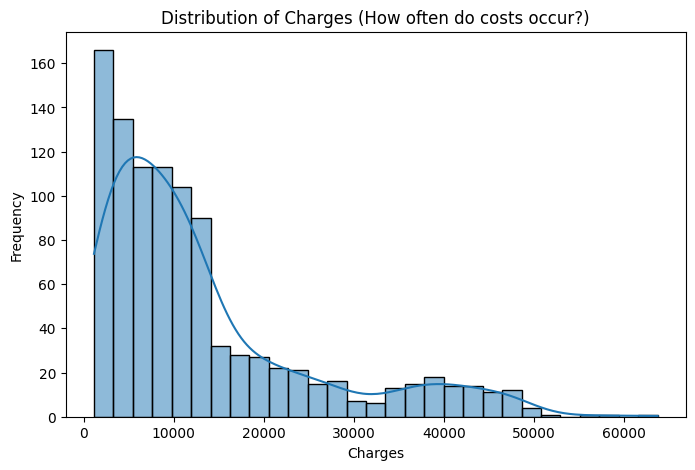

How well did we predict charges? Root Mean Squared Error: 6150.270304644928
How well does the model explain the charges? R-squared: 0.8063197427942789

Coefficients of the linear regression model (how much each feature influences charges):
                  Coefficient
age               3573.621514
bmi               1974.992484
children           306.207507
sex_male          -264.514868
smoker_yes        8990.502208
region_northwest  -417.728365
region_southeast  -757.673547
region_southwest  -546.134093

Permutation Importance of Features:
            Feature  Importance
4        smoker_yes    1.069908
0               age    0.150580
1               bmi    0.044752
7  region_southwest    0.005137
2          children    0.003742
6  region_southeast    0.000458
5  region_northwest   -0.000284
3          sex_male   -0.000943


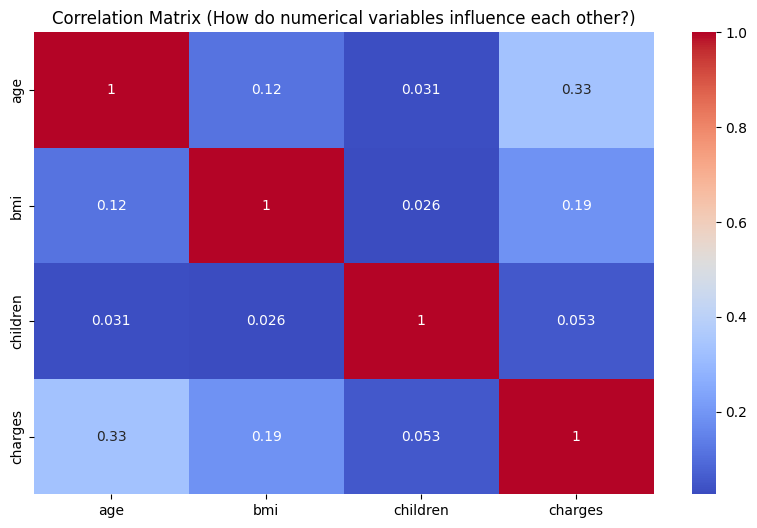

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Load the insurance data
data = pd.read_csv('/Users/tanaysaxena/Documents/Coding/ADG_ML/Task_1/insurance.csv')

# Peek at the first few rows to get a sense of the data
print("First glimpse of our data:")
print(data.head())

# Check if any data points are missing in action (missing values)
print("\nAre there any missing values? Let's see:")
print(data.isnull().sum())

# Visualize the spread of 'charges' (our target variable)
plt.figure(figsize=(8,5))
sns.histplot(data['charges'], kde=True)  # Plot the distribution with a smooth density curve
plt.title('Distribution of Charges (How often do costs occur?)')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Convert non-numerical variables into numbers (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Separate features (X) from the target variable (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict charges on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'How well did we predict charges? Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'How well does the model explain the charges? R-squared: {r2}')

# Coefficients of the linear regression model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients of the linear regression model (how much each feature influences charges):")
print(coefficients)

# Permutation Importance
perm_importance = permutation_importance(model, X_test_scaled, y_test)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nPermutation Importance of Features:")
print(importance_df)

# Visualize the correlation matrix (only for numerical columns)
numerical_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')  # Show correlation values and use a coolwarm colormap
plt.title('Correlation Matrix (How do numerical variables influence each other?)')
plt.show()
#This gives me the desired output from the required dataset
#if sir you want to run this file then please change the path accordingly to your system and the place where you downloaded the dataset.s